In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print (classification_report(y_test,y_pred))
    return model

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [9]:
lr= LogisticRegression(random_state = 1)

In [10]:
classify(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()

In [13]:
classify(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
dt2  = DecisionTreeClassifier(max_depth=10)


In [15]:
classify(dt2)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
dt3  = DecisionTreeClassifier(min_samples_leaf=10)


In [17]:
dt3= classify(dt3)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.79      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [18]:
from sklearn import tree

[Text(154.83316996304157, 211.4, 'X[11] <= 206.5\ngini = 0.499\nsamples = 7813\nvalue = [4113, 3700]'),
 Text(72.42509422570258, 199.32, 'X[13] <= 27.5\ngini = 0.325\nsamples = 3136\nvalue = [2495, 641]'),
 Text(54.73057486826698, 187.24, 'X[0] <= 60.5\ngini = 0.247\nsamples = 2456\nvalue = [2101, 355]'),
 Text(40.46255488875878, 175.16, 'X[10] <= 9.5\ngini = 0.221\nsamples = 2375\nvalue = [2075, 300]'),
 Text(17.415039519906323, 163.07999999999998, 'X[10] <= 0.5\ngini = 0.197\nsamples = 2308\nvalue = [2052, 256]'),
 Text(5.88056206088993, 151.0, 'X[6] <= 0.5\ngini = 0.5\nsamples = 115\nvalue = [58, 57]'),
 Text(3.920374707259953, 138.92000000000002, 'X[9] <= 21.5\ngini = 0.346\nsamples = 63\nvalue = [14, 49]'),
 Text(3.1362997658079625, 126.84, 'X[2] <= 1.5\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(1.5681498829039813, 114.75999999999999, 'X[9] <= 15.5\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.7840749414519906, 102.67999999999999, 'gini = 0.42\nsamples = 10\nv

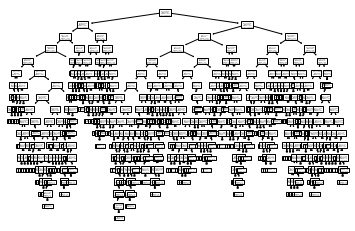

In [19]:
tree.plot_tree(dt3)

In [20]:
dt3.feature_importances_

array([0.0536955 , 0.01323104, 0.00708666, 0.00247459, 0.        ,
       0.04446577, 0.05931688, 0.00252839, 0.0872283 , 0.05579961,
       0.10590988, 0.43476746, 0.00759507, 0.06477719, 0.01216181,
       0.04896185])

In [21]:
a=dt3.feature_importances_
a.sort()
a

array([0.        , 0.00247459, 0.00252839, 0.00708666, 0.00759507,
       0.01216181, 0.01323104, 0.04446577, 0.04896185, 0.0536955 ,
       0.05579961, 0.05931688, 0.06477719, 0.0872283 , 0.10590988,
       0.43476746])

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [23]:
from sklearn.ensemble import VotingClassifier

In [24]:
lr = LogisticRegression()
dt1  =DecisionTreeClassifier()
dt2 =DecisionTreeClassifier(criterion="entropy")

In [25]:
model_list=[("m1",lr),("m2",dt1),('m3',dt2)]
    

In [26]:
vc =VotingClassifier(estimators=model_list)

In [27]:
classify(vc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



VotingClassifier(estimators=[('m1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('m2',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                             ('m3',
    

In [28]:
vc2= vc =VotingClassifier(estimators=model_list,voting='soft')

In [29]:
classify(vc2)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



VotingClassifier(estimators=[('m1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('m2',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                             ('m3',
    

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
#bagging
bc = BaggingClassifier(lr,n_estimators=5,max_samples=100,random_state=1)

In [32]:
classify(bc)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1760
           1       0.80      0.74      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=1, verb

In [33]:
#pasting
pc2 = BaggingClassifier(lr,n_estimators=5,max_samples=100,random_state=1,bootstrap=False)

In [34]:
classify(pc2)

              precision    recall  f1-score   support

           0       0.76      0.84      0.79      1760
           1       0.79      0.70      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=1, ver

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf  = RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [40]:
classify(rf)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1760
           1       0.82      0.83      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

###### stacking

In [41]:
!pip install mlxtend

In [42]:
from mlxtend.classifier import StackingClassifier

In [43]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion='entropy')

In [44]:
model_list = [lr,dt1,dt2]

In [45]:
meta = LogisticRegression()

In [46]:
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [47]:
classify(sc)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1760
           1       0.75      0.89      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.82      0.81      0.81      3349
weighted avg       0.82      0.81      0.81      3349



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

## ada boosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada = AdaBoostClassifier(n_estimators=100)

In [50]:
classify(ada)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1760
           1       0.83      0.80      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gb = GradientBoostingClassifier(n_estimators=100)

In [53]:
classify(gb)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### XG BOOST

In [55]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

In [57]:
xc = XGBClassifier(n_estimators=100,Lambda=2)

In [58]:
classify(xc)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



XGBClassifier(Lambda=2, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)